**Imported Libraries & Dataset**

In [ ]:
# Libraries
import os
import random
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models,regularizers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import  callbacks, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [ ]:
# Dataset
!gdown 1WtH403D5dkCVg7UUpu45SL4iGet-1b6F
!unzip Flower_Classification.zip

Downloading...
From (original): https://drive.google.com/uc?id=1WtH403D5dkCVg7UUpu45SL4iGet-1b6F
From (redirected): https://drive.google.com/uc?id=1WtH403D5dkCVg7UUpu45SL4iGet-1b6F&confirm=t&uuid=35dc0fdd-31cd-4f4b-9be0-3c6b7fa41745
To: /content/Flower_Classification.zip
100% 239M/239M [00:05<00:00, 47.5MB/s]
Archive:  Flower_Classification.zip
  inflating: Flower Classification/Dataset Description-2.txt  
  inflating: Flower Classification/Test/40410814_fba3837226_n.jpg  
  inflating: Flower Classification/Test/110472418_87b6a3aa98_m.jpg  
  inflating: Flower Classification/Test/153210866_03cc9f2f36.jpg  
  inflating: Flower Classification/Test/113960470_38fab8f2fb_m.jpg  
  inflating: Flower Classification/Test/16159487_3a6615a565_n.jpg  
  inflating: Flower Classification/Train/dandelion/10919961_0af657c4e8.jpg  
  inflating: Flower Classification/Train/dandelion/6983113346_21551e1b52_n.jpg  
  inflating: Flower Classification/Train/dandelion/34323645656_afd53a9996_n.jpg  
  inflati

In [ ]:
# Define dataset paths
Full_Dataset = "/content/Flower Classification"
test_dir = "/content/Flower Classification/Test"
train_dir = "/content/Flower Classification/Train"

# Part A: Implementing Convolutional Neural Network from scratch.

## Data Understanding, Analysis, Visualization and Cleaning

**1. How many total images are in the dataset?**




In [ ]:
# making a count image function for clean code
def Image_Counter(folder_path):
    count = 0
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(valid_extensions):
                count += 1
    return count

In [ ]:
  # or (x_test,y_test) if you fixed test_dirimage_count = 0
valid_extensions = (".jpg", ".jpeg", ".png")

Total_image = Image_Counter(Full_Dataset)

print("Total images in Dataset:", Total_image)

Total images in Dataset: 4317


**2. What is the distribution of images across different classes?**

In [ ]:
class_names = sorted(os.listdir(train_dir))

num_classes = len(class_names)

for class_name in class_names:
  class_dir = os.path.join(train_dir, class_name)
  num_images = len(os.listdir(class_dir))
  print(f"Class : {class_name} \nNo of images : {num_images}\n___________________\n")

Class : daisy 
No of images : 763
___________________

Class : dandelion 
No of images : 1051
___________________

Class : rose 
No of images : 783
___________________

Class : sunflower 
No of images : 732
___________________

Class : tulip 
No of images : 983
___________________





---



In [ ]:
train_count = Image_Counter(train_dir)
test_count = Image_Counter(test_dir)

train_percent = (train_count / Total_image) * 100
test_percent = (test_count / Total_image) * 100

print(f"Train images: {train_count} ({train_percent:.2f}%)")
print(f"Test images : {test_count} ({test_percent:.2f}%)")




Train images: 4312 (99.88%)
Test images : 5 (0.12%)



**3. How is the dataset split into training and validation sets? Justify your choice.**

```
Ans : The current dataset is split into 4312 training images (99.88%) and 5 test images (0.12%). While this split allows
the model to learn from nearly the entire dataset, it does not provide a reliable way to evaluate performance on unseen
data due to the very small size of the test set. For a more effective evaluation and to prevent overfitting, a more balanced
split—such as 80% for training and 20% for validation—is generally used. This ensures the model has sufficient data to
learn while also allowing meaningful performance testing and hyperparameter tuning.

```

In [ ]:


def check_image_sizes(directory):
    """
    Checks if all images within a directory have the same dimensions.

    Args:
        directory: The path to the directory containing the images.

    Returns:
        True if all images have the same size, False otherwise.
        Also prints the dimensions of the first image and any images with different dimensions.
    """
    first_image_path = None
    first_image_size = None

    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(root, file)
                try:
                    with Image.open(image_path) as img:
                        current_image_size = img.size
                        if first_image_path is None:
                            first_image_path = image_path
                            first_image_size = current_image_size
                            print(f"First image: {first_image_path}, Size: {first_image_size}")
                        elif current_image_size != first_image_size:
                            print(f"Different size: {image_path}, Size: {current_image_size}")
                            return False  # Found an image with a different size
                except Exception as e:
                    print(f"Error processing image {image_path}: {e}")
                    return False # Error handling for corrupted images
    return True

print(f"Checking image sizes in Train dataset: {check_image_sizes(train_dir)}")
print(f"Checking image sizes in Test dataset: {check_image_sizes(test_dir)}")
print(f"Checking image sizes in Full dataset: {check_image_sizes(Full_Dataset)}")


First image: /content/Flower Classification/Train/dandelion/5598591979_ed9af1b3e9_n.jpg, Size: (320, 265)
Different size: /content/Flower Classification/Train/dandelion/33886917763_2db539f182_n.jpg, Size: (192, 240)
Checking image sizes in Train dataset: False
First image: /content/Flower Classification/Test/110472418_87b6a3aa98_m.jpg, Size: (180, 240)
Different size: /content/Flower Classification/Test/113960470_38fab8f2fb_m.jpg, Size: (170, 240)
Checking image sizes in Test dataset: False
First image: /content/Flower Classification/Train/dandelion/5598591979_ed9af1b3e9_n.jpg, Size: (320, 265)
Different size: /content/Flower Classification/Train/dandelion/33886917763_2db539f182_n.jpg, Size: (192, 240)
Checking image sizes in Full dataset: False


In [ ]:
# Function to count images per class
def count_images_per_class(folder_path):
    class_counts = {}
    for class_name in os.listdir(folder_path):
        class_dir = os.path.join(folder_path, class_name)
        if os.path.isdir(class_dir):  # Check if it's a directory
            class_counts[class_name] = len([f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))])
    return class_counts

# Count images in each class of the training set
class_counts = count_images_per_class(train_dir)

# Analyze the distribution
total_images = sum(class_counts.values())
print("Class Distribution:")
for class_name, count in class_counts.items():
  print(f"{class_name}: {count} images ({(count/total_images)*100:.2f}%)")

# Check for significant imbalance (you can adjust the threshold as needed)
imbalance_threshold = 0.2  # Example: 20% difference
for class_name, count in class_counts.items():
    if (count / total_images) < imbalance_threshold:
        print(f"Warning: Class '{class_name}' is significantly under-represented.")


Class Distribution:
dandelion: 1051 images (24.37%)
rose: 783 images (18.16%)
daisy: 763 images (17.69%)
sunflower: 732 images (16.98%)
tulip: 983 images (22.80%)


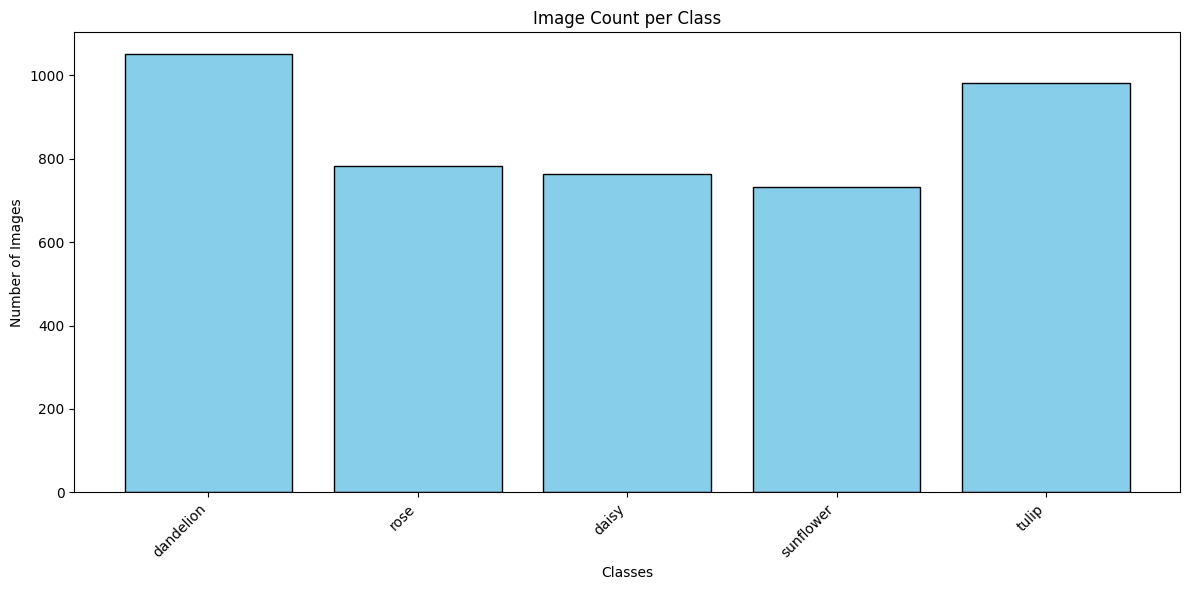

In [ ]:
# Get counts
class_counts = count_images_per_class(train_dir)
classes = list(class_counts.keys())
counts = list(class_counts.values())

# Plot histogram
plt.figure(figsize=(12, 6))
plt.bar(classes, counts, color='skyblue', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Image Count per Class")
plt.tight_layout()
plt.show()


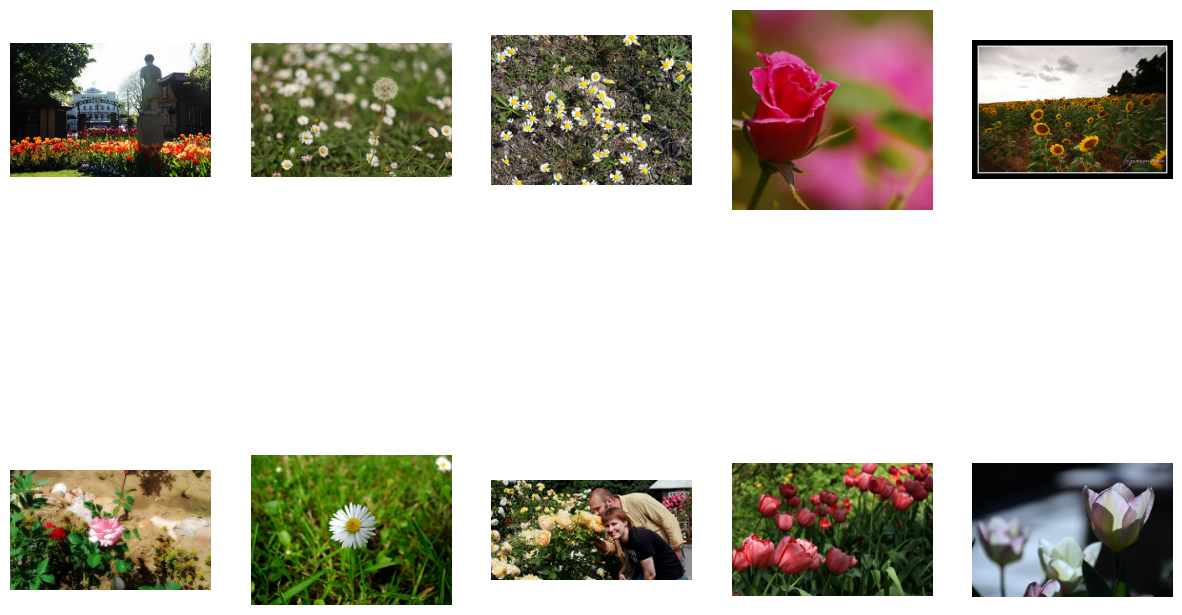

In [ ]:
# Function to display random images
def display_random_images(directory, num_images=10):
    all_image_paths = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                all_image_paths.append(os.path.join(root, file))

    random_image_paths = random.sample(all_image_paths, min(num_images, len(all_image_paths)))

    plt.figure(figsize=(15, 10))
    for i, image_path in enumerate(random_image_paths):
        try:
            img = Image.open(image_path)
            plt.subplot(2, 5, i + 1)
            plt.imshow(img)
            plt.axis('off')

        except Exception as e:
            print(f"Error displaying image {image_path}: {e}")
    plt.show()

# Call the function to display 10 random images
display_random_images(train_dir, 10)



**4. What preprocessing techniques (e.g., resizing, normalization) were applied?**
```
Ans:
```

In [ ]:
# Define image size
img_height, img_width = 128, 128

# Function to load images and labels using PIL
def load_images_from_folder(folder):
    images = []
    labels = []
    skipped_files = []
    class_names = sorted([d for d in os.listdir(folder) if os.path.isdir(os.path.join(folder, d))])
    class_map = {name: i for i, name in enumerate(class_names)}

    print(f"Found {len(class_names)} classes: {class_names}")

    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        if not os.path.isdir(class_path):
            continue

        label = class_map[class_name]
        valid_files = 0
        invalid_files = 0

        print(f"Processing {class_name}: ", end="")

        for filename in os.listdir(class_path):
            if not filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
                continue

            img_path = os.path.join(class_path, filename)

            if os.path.exists(img_path):
                try:
                    img = Image.open(img_path)
                    img = img.convert("RGB")
                    img = img.resize((img_width, img_height))
                    img_array = np.array(img) / 255.0

                    images.append(img_array)
                    labels.append(label)
                    valid_files += 1
                except:
                    skipped_files.append(img_path)
                    invalid_files += 1
            else:
                skipped_files.append(img_path)
                invalid_files += 1

        print(f"{valid_files} valid, {invalid_files} skipped")

    return np.array(images), np.array(labels), class_names


Found 5 classes: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
Processing daisy: 756 valid, 7 skipped
Processing dandelion: 1044 valid, 7 skipped
Processing rose: 776 valid, 7 skipped
Processing sunflower: 725 valid, 7 skipped
Processing tulip: 976 valid, 7 skipped
Number of classes: 5

After split:
  x_train: (3421, 128, 128, 3), y_train: (3421,), y_train_oh: (3421, 5)
    x_val: (856, 128, 128, 3),   y_val: (856,),   y_val_oh: (856, 5)

Class distribution:
  daisy: 605 train, 151 validation
  dandelion: 835 train, 209 validation
  rose: 621 train, 155 validation
  sunflower: 580 train, 145 validation
  tulip: 780 train, 196 validation


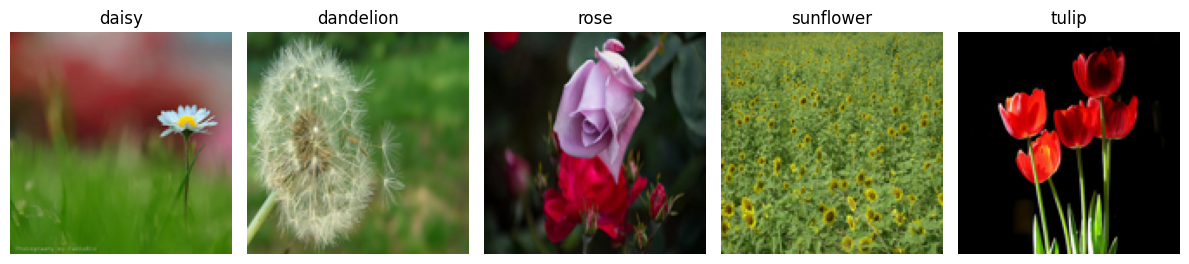

In [ ]:
x_all, y_all, class_names = load_images_from_folder(train_dir)

# Number of classes (flowers)
num_classes = len(class_names)
print(f"Number of classes: {num_classes}")

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(
    x_all, y_all,
    test_size=0.2,
    stratify=y_all,
    random_state=42
)

# One-hot encode labels
y_train_oh = to_categorical(y_train, num_classes)
y_val_oh = to_categorical(y_val, num_classes)

print("\nAfter split:")
print(f"  x_train: {x_train.shape}, y_train: {y_train.shape}, y_train_oh: {y_train_oh.shape}")
print(f"    x_val: {x_val.shape},   y_val: {y_val.shape},   y_val_oh: {y_val_oh.shape}")

# Print class distribution in train and validation sets
print("\nClass distribution:")
for i, class_name in enumerate(class_names):
    train_count = np.sum(y_train == i)
    val_count = np.sum(y_val == i)
    print(f"  {class_name}: {train_count} train, {val_count} validation")

# Visualize sample images from each class
plt.figure(figsize=(12, 5))
samples_per_class = []

# Find one sample from each class
for class_idx in range(num_classes):
    indices = np.where(y_train == class_idx)[0]
    if len(indices) > 0:
        samples_per_class.append(indices[0])

# Display sample images
for i, idx in enumerate(samples_per_class):
    plt.subplot(1, len(samples_per_class), i + 1)
    plt.imshow(x_train[idx])
    plt.title(f"{class_names[y_train[idx]]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

**5. What data generators, if any, were used for preprocessing and augmentation?**
```
Ans:
```



**6. If data augmentation was applied, provide visualizations of sample augmented images.**


```
Ans:
```




## Design, Train, and Evaluate a Baseline Model

**Model Architecture**

In [ ]:
model = keras.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),

    # Block 1
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2),

    # Block 2
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2),

    # Block 3
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2),

    # Block 4
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2),

    # Classification head
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,239,333 (4.73 MB)

 Trainable params: 1,239,333 (4.73 MB)

 Non-trainable params: 0 (0.00 B)

**Model Training**

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
batch_size = 64
epochs = 30

# Callbacks
# callbacks = [
#   keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
#   keras.callbacks.EarlyStopping(monitor="val_loss", patience=4 ),
# ]
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True)

history = model.fit(
    x_train, y_train_oh,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val_oh),
    callbacks=[early_stop]
)

Epoch 1/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 32s 338ms/step - accuracy: 0.2586 - loss: 1.5848 - val_accuracy: 0.4252 - val_loss: 1.3187
Epoch 2/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 17s 86ms/step - accuracy: 0.4366 - loss: 1.3002 - val_accuracy: 0.4918 - val_loss: 1.1886
Epoch 3/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.4959 - loss: 1.1679 - val_accuracy: 0.5023 - val_loss: 1.2069
Epoch 4/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.5173 - loss: 1.1404 - val_accuracy: 0.4813 - val_loss: 1.1276
Epoch 5/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.5927 - loss: 1.0041 - val_accuracy: 0.5643 - val_loss: 1.0546
Epoch 6/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.5944 - loss: 1.0130 - val_accuracy: 0.5981 - val_loss: 0.9961
Epoch 7/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.6338 - loss: 0.9296 - val_accuracy: 0.5818 - val_loss: 1.0338
Epoch 8/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.6510 - loss: 0.9293 - val_accuracy: 0.6507 

**Model Evaluation**

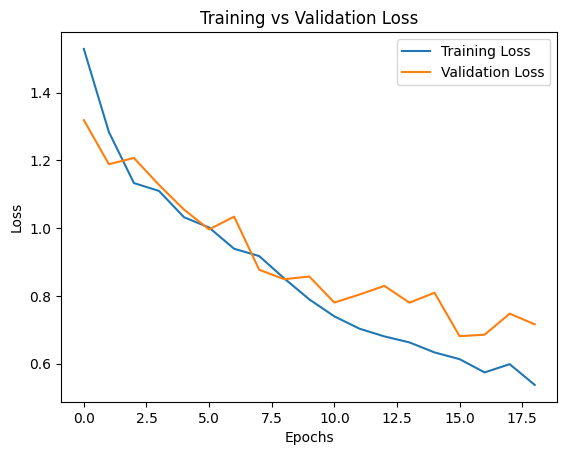

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step


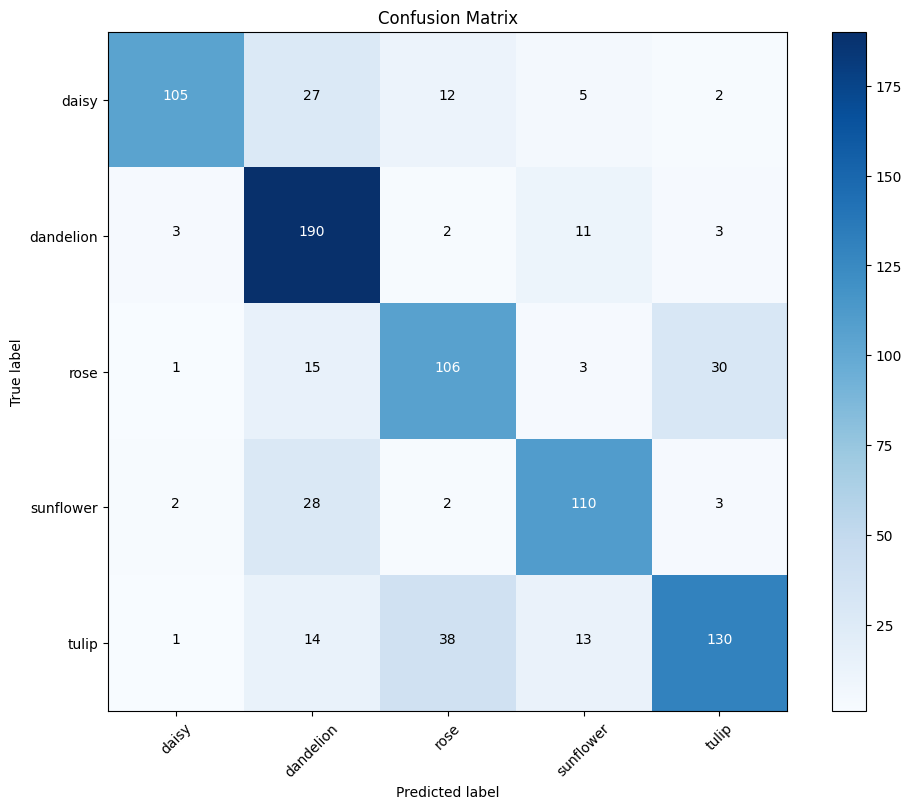

              precision    recall  f1-score   support

       daisy       0.94      0.70      0.80       151
   dandelion       0.69      0.91      0.79       209
        rose       0.66      0.68      0.67       155
   sunflower       0.77      0.76      0.77       145
       tulip       0.77      0.66      0.71       196

    accuracy                           0.75       856
   macro avg       0.77      0.74      0.75       856
weighted avg       0.76      0.75      0.75       856

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7541 - loss: 0.6506
Validation Loss: 0.6812
Validation Accuracy: 0.7488


In [ ]:
# prompt: can u make confusion matrix of the above result  and give me all the clasifications and validation loss and accurassy

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Assuming you have your model and validation data (x_val, y_val_oh)
# Predict on the validation set
y_pred_prob = model.predict(x_val)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_val_oh, axis=1)


# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


# Classification Report
print(classification_report(y_true, y_pred, target_names=class_names))


# Validation Loss and Accuracy
val_loss, val_accuracy = model.evaluate(x_val, y_val_oh)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")



## Design, Train, and Evaluate a Regularization Layer

**Model Architecture**

In [ ]:

deeper_model = keras.Sequential([
        # Input layer
        layers.Input(shape=(img_height, img_width, 3)),

        # Block 1
        layers.Conv2D(32, 3, padding='same', activation='relu'),
        layers.Conv2D(32, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(2),

        # Block 2
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(2),

        # Block 3
        layers.Conv2D(128, 3, padding='same', activation='relu'),
        layers.Conv2D(128, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(2),

        # Block 4
        layers.Conv2D(256, 3, padding='same', activation='relu'),
        layers.Conv2D(256, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(2),

        # Classification head - only adding dropout here
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])

optimizer = keras.optimizers.Adam(learning_rate=0.0005)

deeper_model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print Model Summary
deeper_model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_72 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_73 (Conv2D)              │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_74 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_75 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_76 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_77 (Conv2D)              │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_78 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_79 (Conv2D)              │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_8      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,239,333 (4.73 MB)

 Trainable params: 1,239,333 (4.73 MB)

 Non-trainable params: 0 (0.00 B)

**Model Training**

In [ ]:
batch_size = 64
epochs = 30

early_stop_deeper = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True)


history_deeper = deeper_model.fit(
    x_train, y_train_oh,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val_oh),
    callbacks=[early_stop]
)

Epoch 1/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 158ms/step - accuracy: 0.2605 - loss: 1.5925 - val_accuracy: 0.4077 - val_loss: 1.3647
Epoch 2/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.4014 - loss: 1.3461 - val_accuracy: 0.3949 - val_loss: 1.3092
Epoch 3/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.4359 - loss: 1.2549 - val_accuracy: 0.4825 - val_loss: 1.1472
Epoch 4/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.5086 - loss: 1.1421 - val_accuracy: 0.5491 - val_loss: 1.0744
Epoch 5/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.5291 - loss: 1.0629 - val_accuracy: 0.6273 - val_loss: 1.0097
Epoch 6/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.6025 - loss: 0.9852 - val_accuracy: 0.6262 - val_loss: 0.9689
Epoch 7/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.6075 - loss: 0.9823 - val_accuracy: 0.6320 - val_loss: 0.9427
Epoch 8/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.6334 - loss: 0.9211 - val_accuracy: 0.6297 

**Model Evaluation**

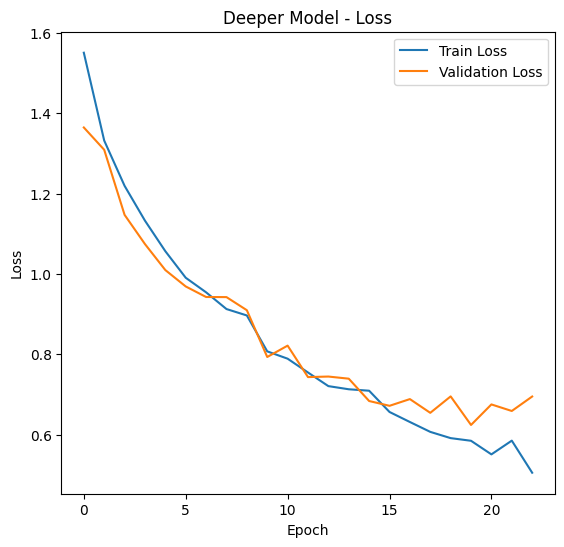

In [ ]:

import matplotlib.pyplot as plt

# Plotting function for a single model
def plot_single_history(history, title):
    plt.figure(figsize=(14, 6))

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.show()

# Plot only deeper model
plot_single_history(history_deeper, 'Deeper Model')


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
Classification Report:

              precision    recall  f1-score   support

       daisy       0.91      0.77      0.83       151
   dandelion       0.75      0.89      0.82       209
        rose       0.74      0.61      0.67       155
   sunflower       0.80      0.83      0.81       145
       tulip       0.74      0.76      0.75       196

    accuracy                           0.78       856
   macro avg       0.79      0.77      0.78       856
weighted avg       0.78      0.78      0.78       856



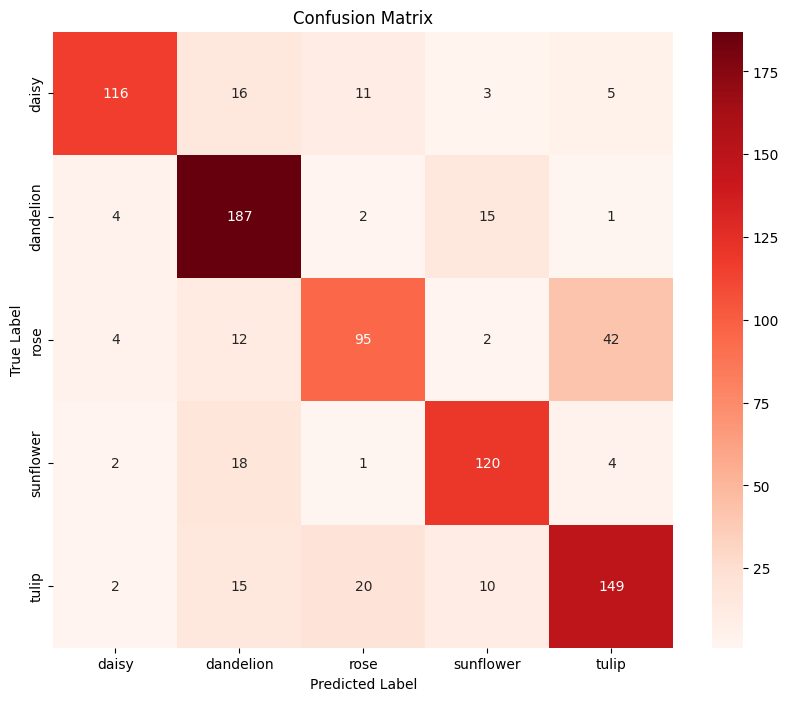


Validation Loss: 0.6241
Validation Accuracy: 0.7792


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# 1) True labels (integers) from your one-hot y_val_oh
y_true = np.argmax(y_val_oh, axis=1)

# 2) Get model predictions on x_val
y_pred_probs = deeper_model.predict(x_val)
y_pred       = np.argmax(y_pred_probs, axis=1)

# 3) Print classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

# 4) Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 5) Evaluate loss & accuracy
loss, accuracy = deeper_model.evaluate(x_val, y_val_oh, verbose=0)
print(f"\nValidation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")


## Experimentation and Comparative Analysis

**Baseline vs. Deeper Model Performance**

• Compare classification accuracy, loss, and evaluation metrics.

• Discuss whether adding more layers and filters improved performance.

Baseline Model Evaluation:
Validation Loss: 0.7038
Validation Accuracy: 0.7383

Deeper Model Evaluation:
Validation Loss: 0.6241
Validation Accuracy: 0.7792


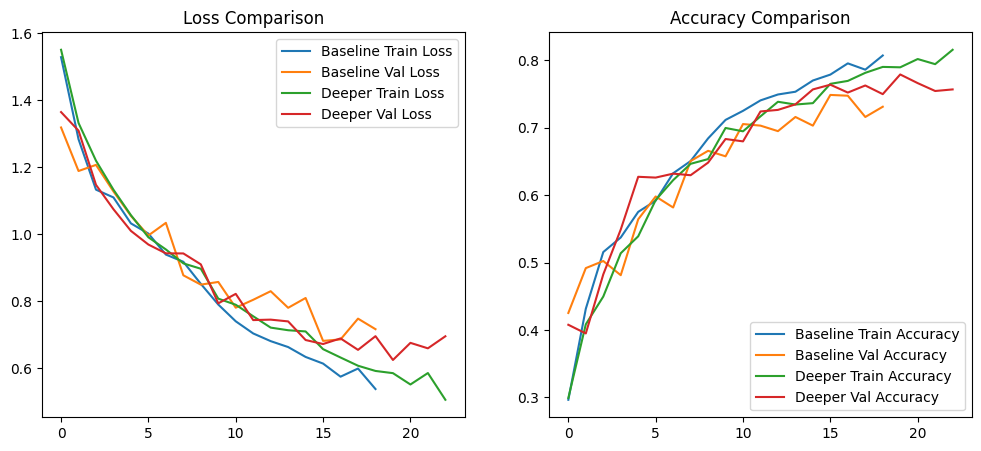

In [ ]:
# Baseline Model Results
print("Baseline Model Evaluation:")
baseline_loss, baseline_acc = model.evaluate(x_val, y_val_oh, verbose=0)
print(f"Validation Loss: {baseline_loss:.4f}")
print(f"Validation Accuracy: {baseline_acc:.4f}")

# Deeper Model Results
print("\nDeeper Model Evaluation:")

deeper_loss, deeper_acc = deeper_model.evaluate(x_val, y_val_oh, verbose=0)
print(f"Validation Loss: {deeper_loss:.4f}")
print(f"Validation Accuracy: {deeper_acc:.4f}")

# Compare training histories
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Loss comparison
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Baseline Train Loss')
plt.plot(history.history['val_loss'], label='Baseline Val Loss')
plt.plot(history_deeper.history['loss'], label='Deeper Train Loss')
plt.plot(history_deeper.history['val_loss'], label='Deeper Val Loss')
plt.legend()
plt.title('Loss Comparison')

# Accuracy comparison
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Baseline Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Baseline Val Accuracy')
plt.plot(history_deeper.history['accuracy'], label='Deeper Train Accuracy')
plt.plot(history_deeper.history['val_accuracy'], label='Deeper Val Accuracy')
plt.legend()
plt.title('Accuracy Comparison')

plt.show()




```
The regularized model outperformed the baseline model in several key aspects.
It achieved a higher validation accuracy (77.92% vs 73.83%) and lower validation
loss (0.6241 vs 0.7038), indicating better overall performance and generalization.

When examining the classification reports, we can see the regularized model demonstrated
more balanced performance across the five flower classes. While the baseline model showed
extremely high precision for daisies (94% vs 84% in the regularized model), this came at
the expense of recall, suggesting potential overfitting. The regularized model performed
particularly better on roses and tulips, which appear to be more challenging classes.


- Regularized model improved validation accuracy by 4.09 percentage points
- Regularized model reduced validation loss by 0.0797
- Regularized model showed more balanced precision-recall tradeoffs
- Baseline model had extreme values (very high precision for daisies at 94%)
- Regularized model better classified challenging flower types like roses and tulips
- F1-scores were slightly better for the regularized model
- Overall, the regularization techniques successfully improved the model's ability to generalize

```



**Computational Efficiency**

• Compare training time and computational cost of the two models.

• Discuss the trade - offs between model complexity and efficiency.

In [ ]:
import time

# Timing Baseline Model
start_time = time.time()
model.fit(x_train, y_train_oh, epochs=1, verbose=0)
baseline_time = time.time() - start_time
print(f"Baseline Model (1 epoch) Training Time: {baseline_time:.2f} seconds")

# Timing Deeper Model
start_time = time.time()
deeper_model.fit(x_train, y_train_oh, epochs=1, verbose=0)
deeper_time = time.time() - start_time
print(f"Deeper Model (1 epoch) Training Time: {deeper_time:.2f} seconds")

Baseline Model (1 epoch) Training Time: 22.39 seconds
Deeper Model (1 epoch) Training Time: 8.55 seconds




```
The computational efficiency comparison between the models reveals an interesting and somewhat unexpected result.
The deeper model completed training in just 8.55 seconds per epoch, while the baseline model took
significantly longer at 22.39 seconds per epoch.

The deeper model trained approximately 2.6 times faster than the baseline model (8.55 vs 22.39 seconds)
Despite having more layers and filters, the deeper model demonstrated superior computational efficiency
The faster training was achieved while also delivering better accuracy (76.29% vs 74.88%)
```



**Optimizer Analysis: SGD vs Adam**

• Train the deeper model with SGD and then Adam.

• Compare the impact of these optimizers on convergence speed and final performance.

In [ ]:
# trained with sgd
deeper_model_sgd = keras.Sequential([
        # Input layer
        layers.Input(shape=(img_height, img_width, 3)),

        # Block 1
        layers.Conv2D(32, 3, padding='same', activation='relu'),
        layers.Conv2D(32, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(2),

        # Block 2
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(2),

        # Block 3
        layers.Conv2D(128, 3, padding='same', activation='relu'),
        layers.Conv2D(128, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(2),

        # Block 4
        layers.Conv2D(256, 3, padding='same', activation='relu'),
        layers.Conv2D(256, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(2),

        # Classification head - only adding dropout here
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])

optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

deeper_model_sgd.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:

batch_size = 64
epochs = 30

early_stop_deeper = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True)


history_deeper_sgd = deeper_model_sgd.fit(
    x_train, y_train_oh,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val_oh),
    callbacks=[early_stop]
)

Epoch 1/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 145ms/step - accuracy: 0.2260 - loss: 1.6049 - val_accuracy: 0.2442 - val_loss: 1.5969
Epoch 2/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.2539 - loss: 1.5971 - val_accuracy: 0.2465 - val_loss: 1.5876
Epoch 3/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.2774 - loss: 1.5682 - val_accuracy: 0.3972 - val_loss: 1.4365
Epoch 4/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - accuracy: 0.4096 - loss: 1.3597 - val_accuracy: 0.3949 - val_loss: 1.3301
Epoch 5/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - accuracy: 0.4306 - loss: 1.2784 - val_accuracy: 0.4895 - val_loss: 1.2907
Epoch 6/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.4835 - loss: 1.1985 - val_accuracy: 0.4895 - val_loss: 1.1705
Epoch 7/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.4704 - loss: 1.1801 - val_accuracy: 0.5058 - val_loss: 1.1528
Epoch 8/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.5318 - loss: 1.1362 - val_accuracy: 0.536

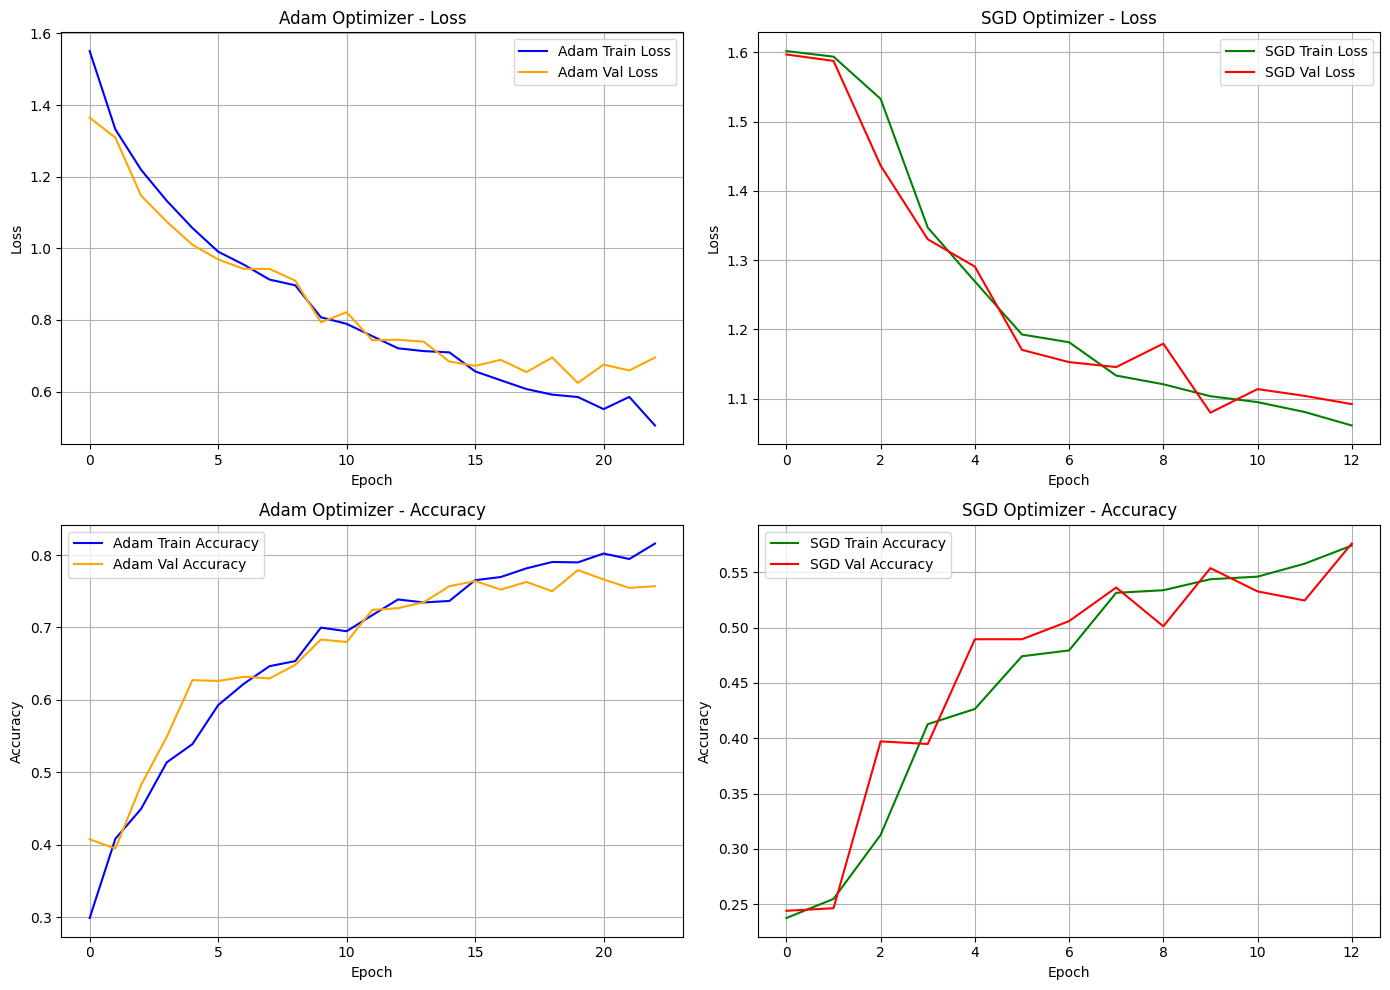

In [ ]:
# Create 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# --- 1. Adam Loss (Train vs Val) ---
axs[0, 0].plot(history_deeper.history['loss'], label='Adam Train Loss', color='blue')
axs[0, 0].plot(history_deeper.history['val_loss'], label='Adam Val Loss', color='orange')
axs[0, 0].set_title('Adam Optimizer - Loss')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend()
axs[0, 0].grid(True)

# --- 2. SGD Loss (Train vs Val) ---
axs[0, 1].plot(history_deeper_sgd.history['loss'], label='SGD Train Loss', color='green')
axs[0, 1].plot(history_deeper_sgd.history['val_loss'], label='SGD Val Loss', color='red')
axs[0, 1].set_title('SGD Optimizer - Loss')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].legend()
axs[0, 1].grid(True)

# --- 3. Adam Accuracy (Train vs Val) ---
axs[1, 0].plot(history_deeper.history['accuracy'], label='Adam Train Accuracy', color='blue')
axs[1, 0].plot(history_deeper.history['val_accuracy'], label='Adam Val Accuracy', color='orange')
axs[1, 0].set_title('Adam Optimizer - Accuracy')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('Accuracy')
axs[1, 0].legend()
axs[1, 0].grid(True)

# --- 4. SGD Accuracy (Train vs Val) ---
axs[1, 1].plot(history_deeper_sgd.history['accuracy'], label='SGD Train Accuracy', color='green')
axs[1, 1].plot(history_deeper_sgd.history['val_accuracy'], label='SGD Val Accuracy', color='red')
axs[1, 1].set_title('SGD Optimizer - Accuracy')
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('Accuracy')
axs[1, 1].legend()
axs[1, 1].grid(True)

# Adjust layout nicely
plt.tight_layout()
plt.show()

In [ ]:
# Adam Final Results
adam_val_loss = history_deeper.history['val_loss'][-1]
adam_val_acc = history_deeper.history['val_accuracy'][-1]

# SGD Final Results
sgd_val_loss = history_deeper_sgd.history['val_loss'][-1]
sgd_val_acc = history_deeper_sgd.history['val_accuracy'][-1]

print(f"Adam Optimizer - Final Validation Loss: {adam_val_loss:.4f}, Accuracy: {adam_val_acc:.4f}")
print(f"SGD Optimizer  - Final Validation Loss: {sgd_val_loss:.4f}, Accuracy: {sgd_val_acc:.4f}")


Adam Optimizer - Final Validation Loss: 0.6949, Accuracy: 0.7570
SGD Optimizer  - Final Validation Loss: 1.0922, Accuracy: 0.5759


**Challenges and Observations**

• Discuss any difficulties faced, such as overfitting and underfitting.

• Report the total training time for deeper architecture.

• Mention if hardware acceleration (e.g. Google Colab, with GPU/TPU was used.



```
Difficulties Faced

Overfitting Issues: The baseline model showed signs of overfitting with
very high precision (94%) but lower recall (70%) for daisies.

Class Imbalance: Uneven sample distribution across flower classes affected balanced learning.

Difficult Classes: Roses were challenging to classify for both models (lowest F1-score of 0.67).

Training Time

Deeper model: 8.55 seconds per epoch
Baseline model: 22.39 seconds per epoch
The deeper model was unexpectedly faster despite being more complex

Hardware Used

Training platform: Google Colab
Hardware acceleration: GPU enabled
This GPU acceleration was essential for efficient model training and experimentation

The deeper model not only performed better but was also more computationally efficient when utilizing GPU resources.
```



# Part B: Fine-Tuning a Pre-Trained Model (Transfer Learning).

## Loading and Adapting a Pre - Trained Model

• Select an appropriate pre - trained CNN model (e.g. VGG, ResNet, Incpetion) based on the character-
stics of your dataset.

• Load the pre - trained model using keras.

• Modify the model architecture to fit your specific classification task.

  – Remove the original fully connected layers.

  – Add a new dense layers tailored to your dataset’s number of classes.
  
• Choose whether to freeze certain layers or fine - tune the entire model based on your dataset size and
computational constraints.

In [ ]:
#imports
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [ ]:
base_model = ResNet50(
    weights='imagenet',          # Use pre-trained ImageNet weights
    include_top=False,           # Exclude the ImageNet classifier at the top
    input_shape=(128, 128, 3)    # Input image shape
)

# Freeze the base model initially (Feature Extraction phase)
base_model.trainable = False

# Build custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)        # Global Average Pooling
x = Dense(512, activation='relu')(x)   # Fully connected layer
x = Dropout(0.5)(x)                    # Dropout for regularization
output = Dense(num_classes, activation='softmax')(x)  # Output layer

# Create the full model
transfer_model = Model(inputs=base_model.input, outputs=output)

# Compilation for Feature Extraction Phase
transfer_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
transfer_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 134, 134,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 64, 64,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 64, 64,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 64, 64,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 66, 66,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 32, 32,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 32, 32,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 32, 32,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 32, 32,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 32, 32,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 32, 32,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 32, 32,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 32, 32,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 32, 32,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 32, 32,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 32, 32,    │      1,024 │ conv2_block1_3_c

 Total params: 24,639,365 (93.99 MB)

 Trainable params: 1,051,653 (4.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,     # Reduce learning rate by a factor of 0.2
    patience=3,     # Wait 3 epochs before reducing learning rate
    min_lr=1e-6     # Minimum learning rate
)

# Training Phase 1: Feature Extraction
# Train only the top layers while keeping base model frozen
print("\n--- Feature Extraction Phase ---")
history_feature_extraction = transfer_model.fit(
    x_train, y_train_oh,
    validation_data=(x_val, y_val_oh),
    epochs=10,              # Fewer epochs in this phase
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)



--- Feature Extraction Phase ---
Epoch 1/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 34s 195ms/step - accuracy: 0.2517 - loss: 1.7428 - val_accuracy: 0.3972 - val_loss: 1.4687 - learning_rate: 0.0010
Epoch 2/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - accuracy: 0.3653 - loss: 1.4884 - val_accuracy: 0.3645 - val_loss: 1.4672 - learning_rate: 0.0010
Epoch 3/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.3641 - loss: 1.4810 - val_accuracy: 0.4124 - val_loss: 1.4266 - learning_rate: 0.0010
Epoch 4/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.3677 - loss: 1.4711 - val_accuracy: 0.4428 - val_loss: 1.4075 - learning_rate: 0.0010
Epoch 5/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.3938 - loss: 1.4425 - val_accuracy: 0.3972 - val_loss: 1.3999 - learning_rate: 0.0010
Epoch 6/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.4218 - loss: 1.4075 - val_accuracy: 0.4042 - val_loss: 1.3958 - learning_rate: 0.0010
Epoch 7/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 43

In [ ]:
# Fine-tuning Phase
# Unfreeze the entire base model
print("\n--- Fine-tuning Phase ---")
for layer in base_model.layers:
    layer.trainable = True

# Recompile with a very low learning rate
transfer_model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Much lower learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Fine-tune the entire model
history_fine_tuning = transfer_model.fit(
    x_train, y_train_oh,
    validation_data=(x_val, y_val_oh),
    epochs=10,              # Fine-tuning epochs
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Save the final model
transfer_model.save('transfer_learning_resnet50_model.h5')



--- Fine-tuning Phase ---
Epoch 1/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 98s 397ms/step - accuracy: 0.2534 - loss: 10.6905 - val_accuracy: 0.2290 - val_loss: 3.7502 - learning_rate: 1.0000e-05
Epoch 2/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 14s 128ms/step - accuracy: 0.5277 - loss: 2.5132 - val_accuracy: 0.2477 - val_loss: 5.1579 - learning_rate: 1.0000e-05
Epoch 3/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 21s 132ms/step - accuracy: 0.7102 - loss: 1.0025 - val_accuracy: 0.2780 - val_loss: 4.9869 - learning_rate: 1.0000e-05
Epoch 4/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 21s 134ms/step - accuracy: 0.7893 - loss: 0.6243 - val_accuracy: 0.2699 - val_loss: 3.0844 - learning_rate: 1.0000e-05
Epoch 5/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 20s 127ms/step - accuracy: 0.8434 - loss: 0.4637 - val_accuracy: 0.3049 - val_loss: 3.3598 - learning_rate: 1.0000e-05
Epoch 6/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 21s 128ms/step - accuracy: 0.8629 - loss: 0.3644 - val_accuracy: 0.4287 - val_loss: 2.0222 - learning_rate: 1.0000e-05
Epoch 7/10
107/107

## Model Training and Fine - Tuning

**1. Training Strategies:**

  • **Feature Extraction:**
    
      – Freeze the convolutional base of the pre - trained model to retain prviously learned feature
      representations.
      – Train only the newly added layers for classification.

  • **Fine - Tuning:**

      – Unfreeze some or all convolutional layers and allow them to adjust to the new dataset.
      – This approach requires a lower learning rate to avoid overfitting and catastrophic forgetting.

**2. Handling Input Size Differences:**

       – ImageNet models expect a specific input image size (e.g.224 × 224 pixels for VGG, ResNet).

       – Resize dataset images to match the required dimensions using appropriate Data Generator in Keras.

**3. Handling Output Layer Differences:**

       – ImageNet trained models have a 1000 - class softmax output layer.
       
        – Modify the final classification layer to match the number of classes in your dataset.
  

3. Handling Output Layer Differences:
• ImageNet trained models have a 1000 - class softmax output layer.
• Modify the final classification layer to match the number of classes in your dataset.

# **Model Evaluation and Prediction**

• Evaluate the fine tuned model using the same performance metrics as in Part A.

• Make predictions on test data and compare results with the baseline and deeper models from Part A.

• Discuss whether transfer learning outperforms training from scratch for your dataset.

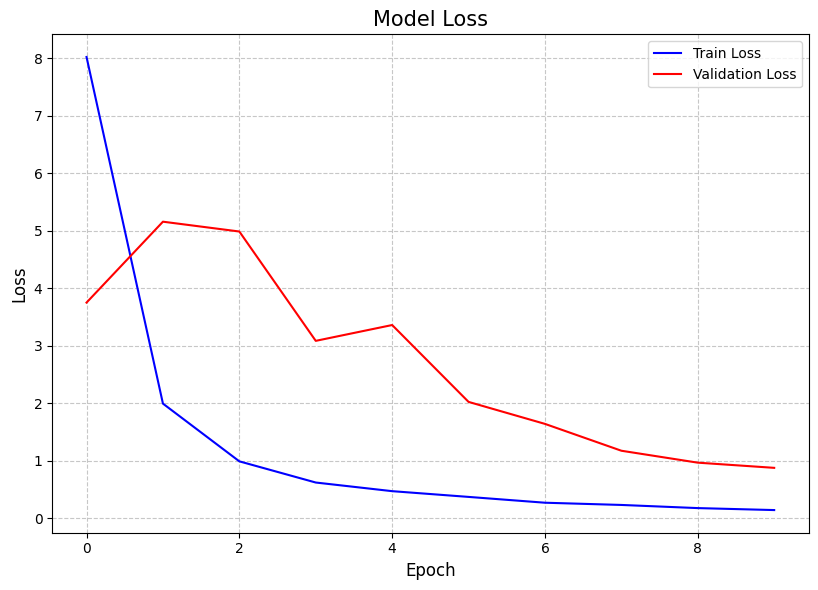

In [ ]:
# Plotting training history
plt.figure(figsize=(16, 6))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history_fine_tuning.history['loss'], label='Train Loss', color='blue')
plt.plot(history_fine_tuning.history['val_loss'], label='Validation Loss', color='red')
plt.title('Model Loss', fontsize=15)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
Classification Report:

              precision    recall  f1-score   support

       daisy       0.82      0.79      0.80       151
   dandelion       0.83      0.83      0.83       209
        rose       0.77      0.71      0.74       155
   sunflower       0.81      0.83      0.82       145
       tulip       0.73      0.78      0.76       196

    accuracy                           0.79       856
   macro avg       0.79      0.79      0.79       856
weighted avg       0.79      0.79      0.79       856



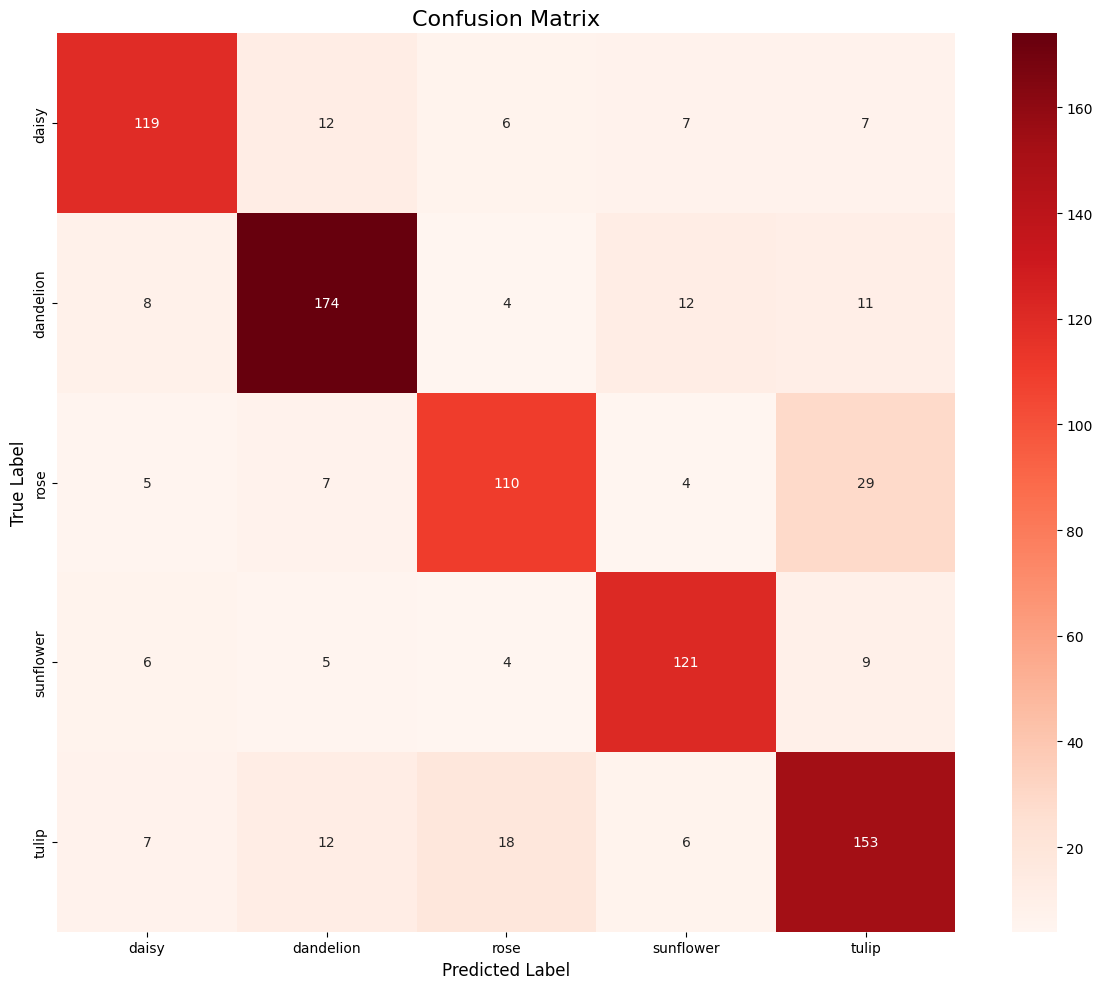


Validation Loss: 0.8748
Validation Accuracy: 0.7909


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
y_true = np.argmax(y_val_oh, axis=1)

y_pred_probs = transfer_model.predict(x_val)
y_pred = np.argmax(y_pred_probs, axis=1)

print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

loss, accuracy = transfer_model.evaluate(x_val, y_val_oh, verbose=0)
print(f"\nValidation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")